<a href="https://colab.research.google.com/github/yuhi-sa/1day/blob/main/EMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 指数移動平均 (Exponential Moving Averages, EMA)

$$\bar{o}_{t+1}=\beta \bar{o}_t+(1-\beta)o_{t+1}$$

$o_t$：観測値  
$\beta$：ハイパーパラメータ

EMAは，平滑化しすぎると元データの特性をつぶしてしまい，平滑化が足りなけ ればノイズが除去しきれない.$\beta$を適切に設計する必要がある．

In [ ]:
import math
import matplotlib.pyplot as plt
import random
from google.colab import files

random.seed(10)

# 指数移動平均フィルタ
def EMA(data, beta):
  tmp = []
  for i in range(len(data)):
    if i == 0 :
      tmp.append(data[0])
    else:
      tmp.append(beta*tmp[i-1]+(1-beta)*data[i])
  return tmp

def sinplot(low, high, noisescale, plotswitch):
  # サンプル周期
  LENGE = 100

  # 真値とノイズデータ作成
  time = []
  original = []
  noisedata = []

  #rand = random.random() - 0.5
  for i in range(LENGE):
    time.append(i / LENGE)

    rand = random.random() - 0.5
    original.append(math.sin(2*math.pi*i/LENGE))
    noisedata.append(math.sin(2*math.pi*i/LENGE) + rand*noisescale)

  # フィルタデータ
  #low = 0.6
  #high = 0.95
  ema05 = EMA(noisedata, low)
  ema095 = EMA(noisedata, high)


  # plo
  # プロット
  lowlabel = "Beta ="+str(low)
  highlabel = "Beta ="+str(high)
  title = "Noise scale ="+str(noisescale)
  test = plt.figure()
  plt.plot(time, original, label="original", color="g")
  plt.plot(time, noisedata, label="noisedata", color="y", linestyle = "--")
  plt.plot(time, ema05, label=lowlabel,  color="r")
  plt.plot(time, ema095, label=highlabel, color="b")
  plt.title(title)
  plt.legend()
  test.show()
  if plotswitch == True:
    test.savefig('test.pdf')
    files.download('test.pdf')

  print("Beta="+str(low)+"のRMSE")
  print(RMSE(ema05,original))
  print("Beta="+str(high)+"のRMSE")
  print(RMSE(ema095,original))

def RMSE(data1, data2):
  sum = 0
  for i in range(len(data1)):
    sum += (data1[i]-data2[i])*(data1[i]-data2[i])
  RMSE=math.sqrt(sum/len(data1))
  return RMSE

sin波に，ノイズを与えEMAでフィルタリングを行う．

Noise Scale が小さい時は，時間遅れの少ない $\beta = 0.2$のフィルタの方 が高い性能となっているが，Noise Scale が大きい場 合は，ノイズを消しきれないため$\beta = 0.9$の方が高 い性能となっている.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Beta=0.2のRMSE
0.1444533302318699
Beta=0.9のRMSE
0.31711365317853896


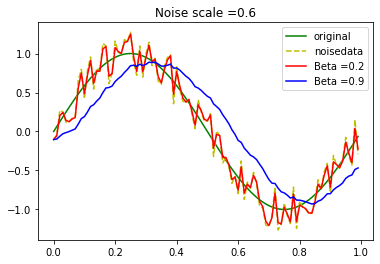

In [ ]:
# ノイズが小さい場合
sinplot(0.2, 0.9, 0.6, True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Beta=0.2のRMSE
0.694611162653989
Beta=0.9のRMSE
0.41248681215726846


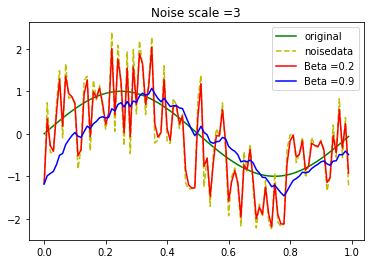

In [ ]:
# ノイズが大きい場合
sinplot(0.2, 0.9, 3, True)